## Import Libraries

In [25]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


%matplotlib inline


## Load the Data

In [26]:
df = pd.read_csv("cleaned.csv")

In [27]:
df.shape

(5745, 19)

In [28]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


## Preprocess the Data

#### Split the data into categorical and numerical

In [29]:
numeric_features = ['height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value']
categorical_features = ['team', 'position']

In [30]:
for i in categorical_features: # checking outliers in categorical features
    print(df[i].value_counts())

team
FC Volendam                         30
1.FC Köln                           28
Orlando Pirates                     27
Kasimpasa                           27
FC Utrecht                          26
                                    ..
América Futebol Clube (MG)           2
Grêmio Foot-Ball Porto Alegrense     2
Coritiba Foot Ball Club              2
CA Huracán                           1
Goiás Esporte Clube                  1
Name: count, Length: 373, dtype: int64
position
Defender Centre-Back          1006
midfield-CentralMidfield       666
Attack Centre-Forward          644
Goalkeeper                     558
Defender Right-Back            522
midfield-DefensiveMidfield     479
Defender Left-Back             473
Attack-RightWinger             430
midfield-AttackingMidfield     420
Attack-LeftWinger              389
midfield-RightMidfield          57
midfield-LeftMidfield           49
Attack-SecondStriker            37
midfield                         6
Defender                    

In [31]:
df.shape

(5745, 19)

In [32]:
# Counts each value in team
type_counts = df['team'].value_counts()

# removes each value that is under 2
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [33]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [34]:
df.shape

(5743, 19)

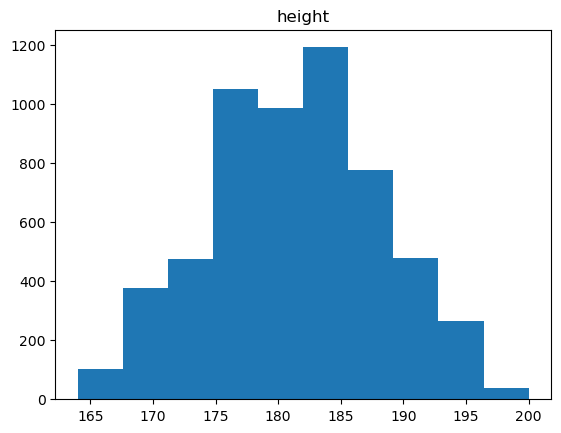

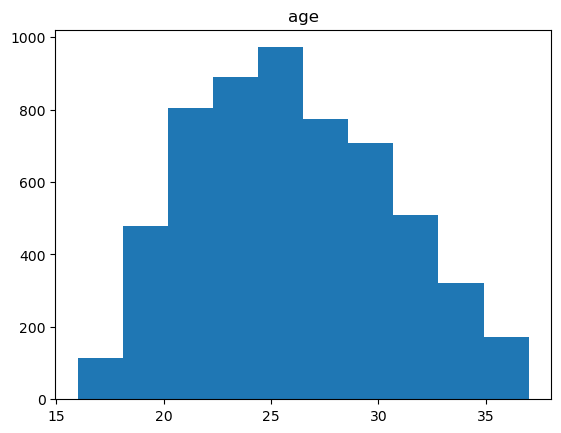

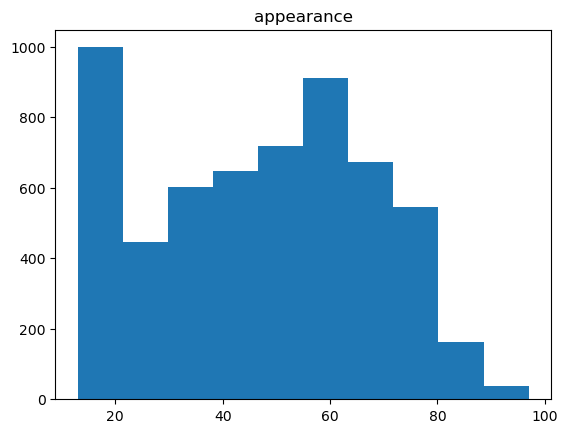

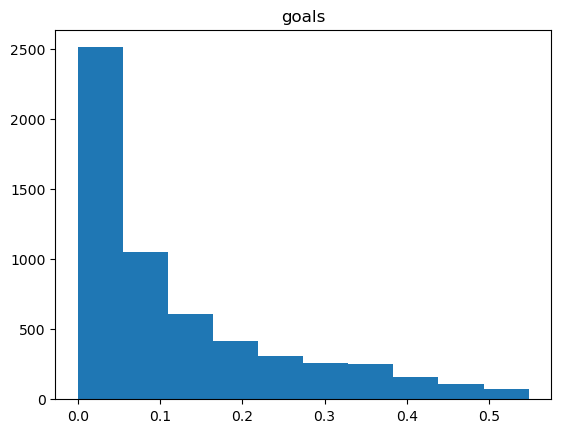

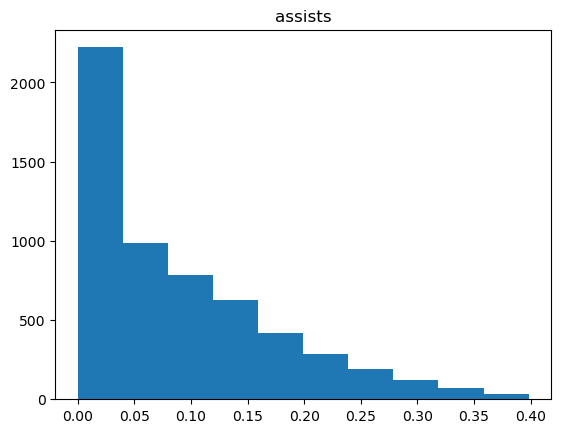

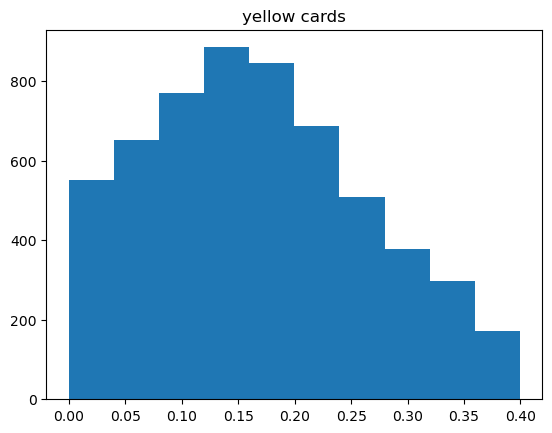

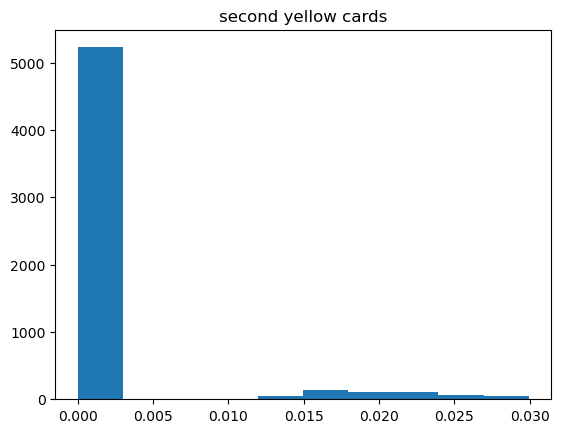

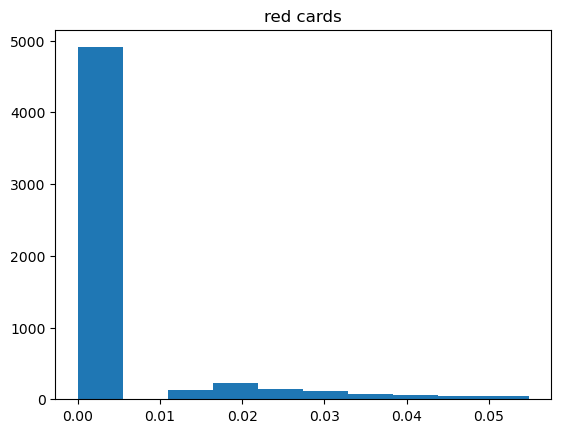

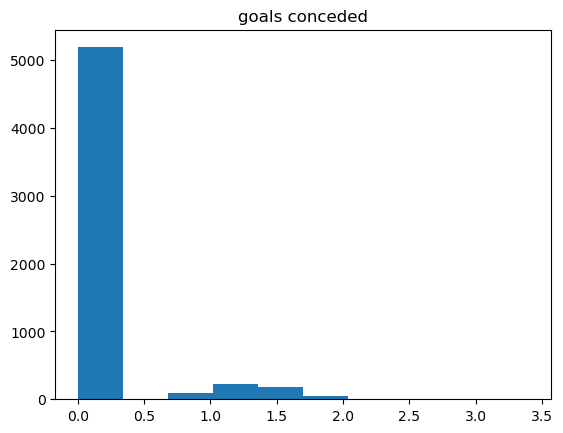

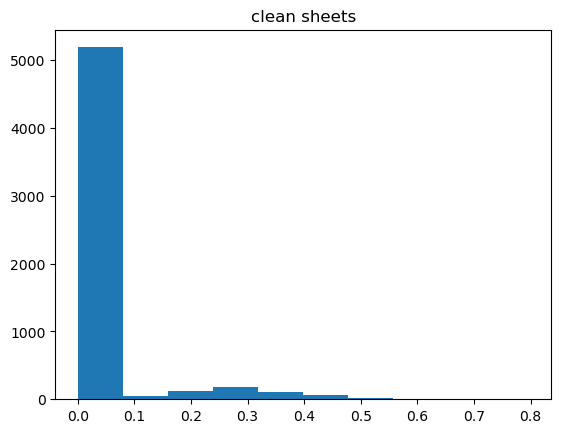

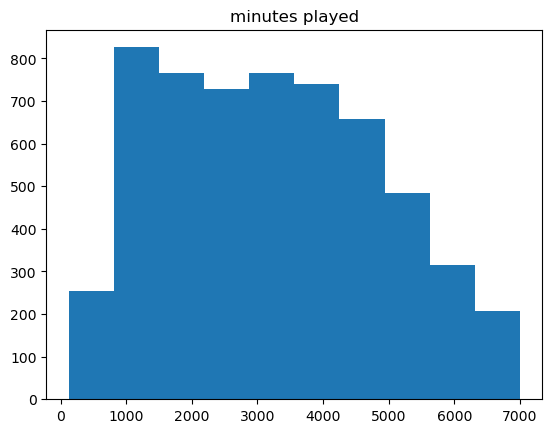

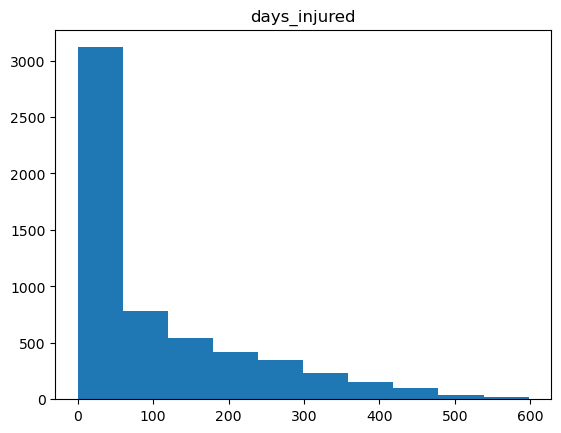

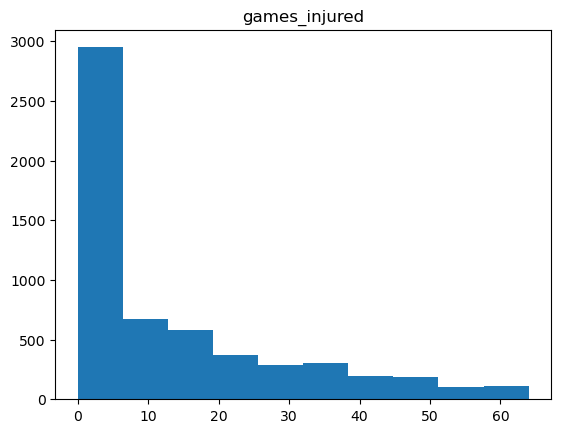

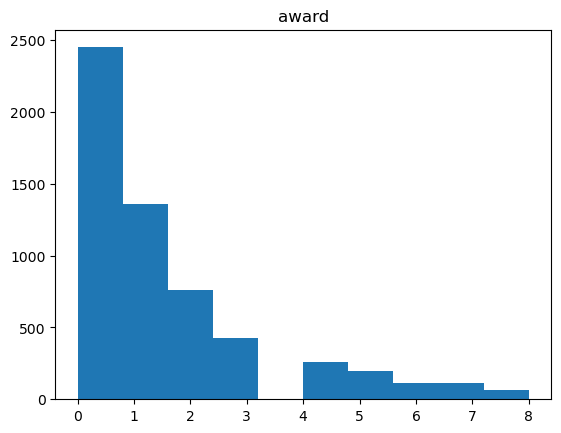

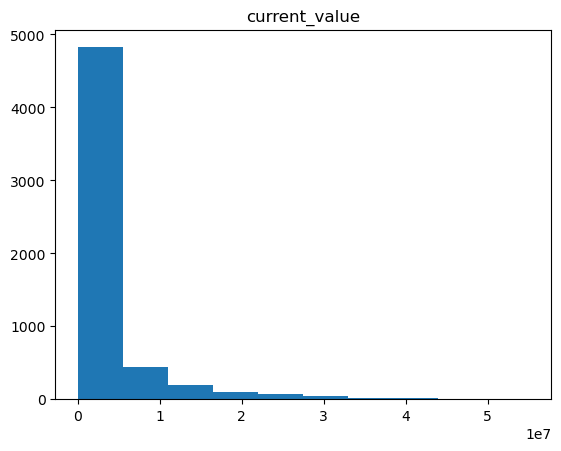

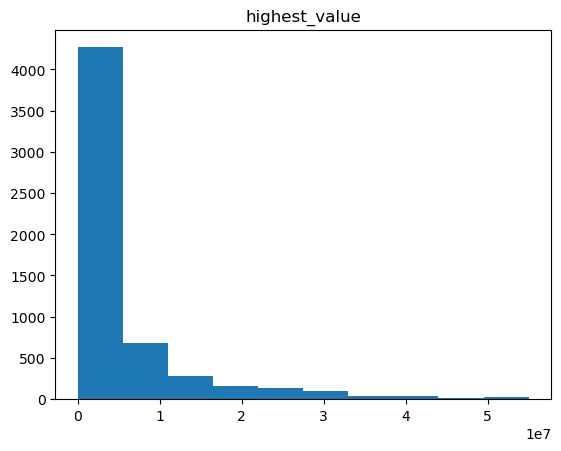

In [35]:
for i in numeric_features: # histogram for each numerical feature 
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [36]:
categorical_features


['team', 'position']

In [37]:
df.drop("Unnamed: 0", inplace=True, axis=1) # removes the column unnamed



In [38]:
df.head() # here we can see that it is removed

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000
2,Manchester United,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.000000,0.000000,0.000000,2686,175,28,1,10000000,12000000
3,Manchester United,Defender Right-Back,183.0,24.0,72,0.032293,0.048439,0.226050,0.0,0.000000,0.000000,0.000000,5574,328,49,3,35000000,35000000
4,Manchester United,Defender Right-Back,183.0,25.0,60,0.000000,0.018817,0.094083,0.0,0.018817,0.000000,0.000000,4783,126,20,1,22000000,40000000


In [39]:
df.head(2)


,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [40]:
df = pd.get_dummies(df, columns=categorical_features) # here we made dummies for each categorical features

In [41]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score, classification_report, f1_score


# model = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')


In [42]:
scaler = StandardScaler()
scaler.fit_transform(df)



array([[ 2.14239614,  0.90719692, -1.55239316, ..., -0.30165451,
        -0.0927661 , -0.10012303],
       [ 0.68166638, -1.14786989, -0.62967563, ..., -0.30165451,
        -0.0927661 , -0.10012303],
       [-0.19477147, -0.91952913, -0.62967563, ..., -0.30165451,
        -0.0927661 , -0.10012303],
       ...,
       [ 1.26595828, -0.46284762, -1.01818827, ..., -0.30165451,
        -0.0927661 , -0.10012303],
       [-0.01358944, -1.6045514 , -1.30957276, ..., -0.30165451,
        -0.0927661 , -0.10012303],
       [-1.65550123, -1.83289216, -1.26100868, ..., -0.30165451,
        -0.0927661 , -0.10012303]])

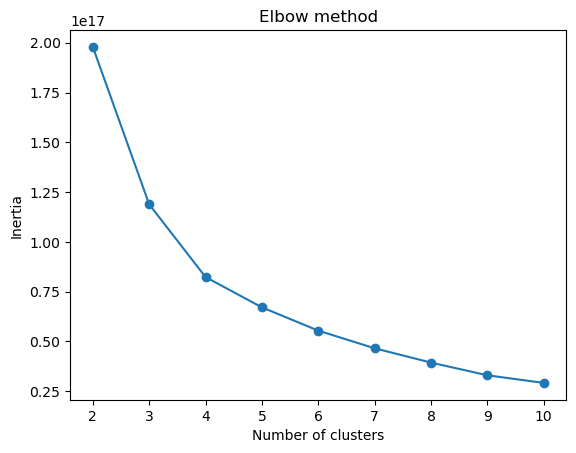

In [43]:
inertias = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()  

In [44]:
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [45]:
df['Label'] = model.labels_
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,Label
0,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,...,False,False,True,False,False,False,False,False,False,1
1,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,0
2,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,1
3,183.0,24.0,72,0.032293,0.048439,0.226050,0.0,0.000000,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,2
4,183.0,25.0,60,0.000000,0.018817,0.094083,0.0,0.018817,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,2


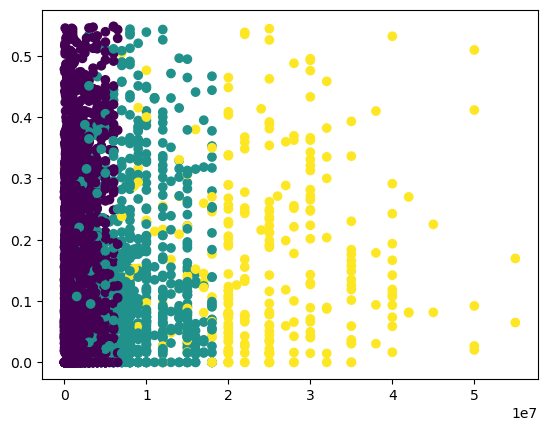

In [64]:
plt.scatter(x=df['current_value'] , y=df['goals'] , c=df['Label'])
plt.show()